## Yield Curve Fitting Approach

In [83]:
import pandas as pd
# from ECIR_new import ECIRModel
# from CIRModel import BasicCIRModel
from Models.ECIR_new import ECIRModel
from Models.CIRModel import BasicCIRModel
import numpy as np
import matplotlib.pyplot as plt

### Merge Dataframe

In [84]:
import pandas as pd

# Load the DGS_30 data
dgs_30_path = 'DGS_30.csv'
dgs_30_data = pd.read_csv(dgs_30_path)

# Load the DGS3MO data
dgs3mo_path = 'DGS3MO.csv'
dgs3mo_data = pd.read_csv(dgs3mo_path)

# Convert the 'DATE' column to datetime and set it as index for both DataFrames
dgs_30_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
dgs_30_data['Date'] = pd.to_datetime(dgs_30_data['Date'])
dgs_30_data.set_index('Date', inplace=True)

dgs3mo_data.rename(columns={'DATE': 'Date'}, inplace=True)
dgs3mo_data['Date'] = pd.to_datetime(dgs3mo_data['Date'])
dgs3mo_data.set_index('Date', inplace=True)

# Insert the DGS3MO data into the DGS_30 data as the first column
dgs_30_data.insert(0, 'DGS3MO', dgs3mo_data['DGS3MO'])

data=dgs_30_data
# Check the result
data.head()

,DGS3MO,DGS1,DGS2,DGS3,DGS4,DGS5,DGS6,DGS7,DGS8,DGS9,...,DGS21,DGS22,DGS23,DGS24,DGS25,DGS26,DGS27,DGS28,DGS29,DGS30
Date,,,,,,,,,,,,,,,,,,,,,
1981-09-01,17.010,17.0600,16.780,16.57,16.350396,16.120,15.898415,15.710,15.573295,15.478799,...,15.070462,15.049236,15.025332,14.997763,14.965539,14.927672,14.883173,14.831054,14.770326,14.7000
1981-09-02,16.650,17.1600,16.780,16.43,16.225968,16.090,15.924878,15.750,15.604572,15.490415,...,15.103136,15.093330,15.078842,15.057928,15.028848,14.989861,14.939224,14.875196,14.796035,14.7000
1981-09-03,16.960,17.3100,16.900,16.48,16.262789,16.140,15.967593,15.780,15.640102,15.546094,...,15.194779,15.177243,15.156281,15.130776,15.099616,15.061687,15.015875,14.961065,14.896145,14.8200
1981-09-04,16.640,17.2400,16.890,16.52,16.302912,16.170,16.019604,15.860,15.720523,15.604793,...,15.237907,15.232570,15.222048,15.204398,15.177676,15.139941,15.089248,15.023655,14.941220,14.8400
1981-09-07,16.565,17.2775,16.935,16.55,16.336354,16.215,16.066772,15.905,15.767511,15.657616,...,15.328694,15.324179,15.314622,15.298188,15.273045,15.237358,15.189294,15.127019,15.048698,14.9525


### CIR Model


#### Yield Curve Prediction

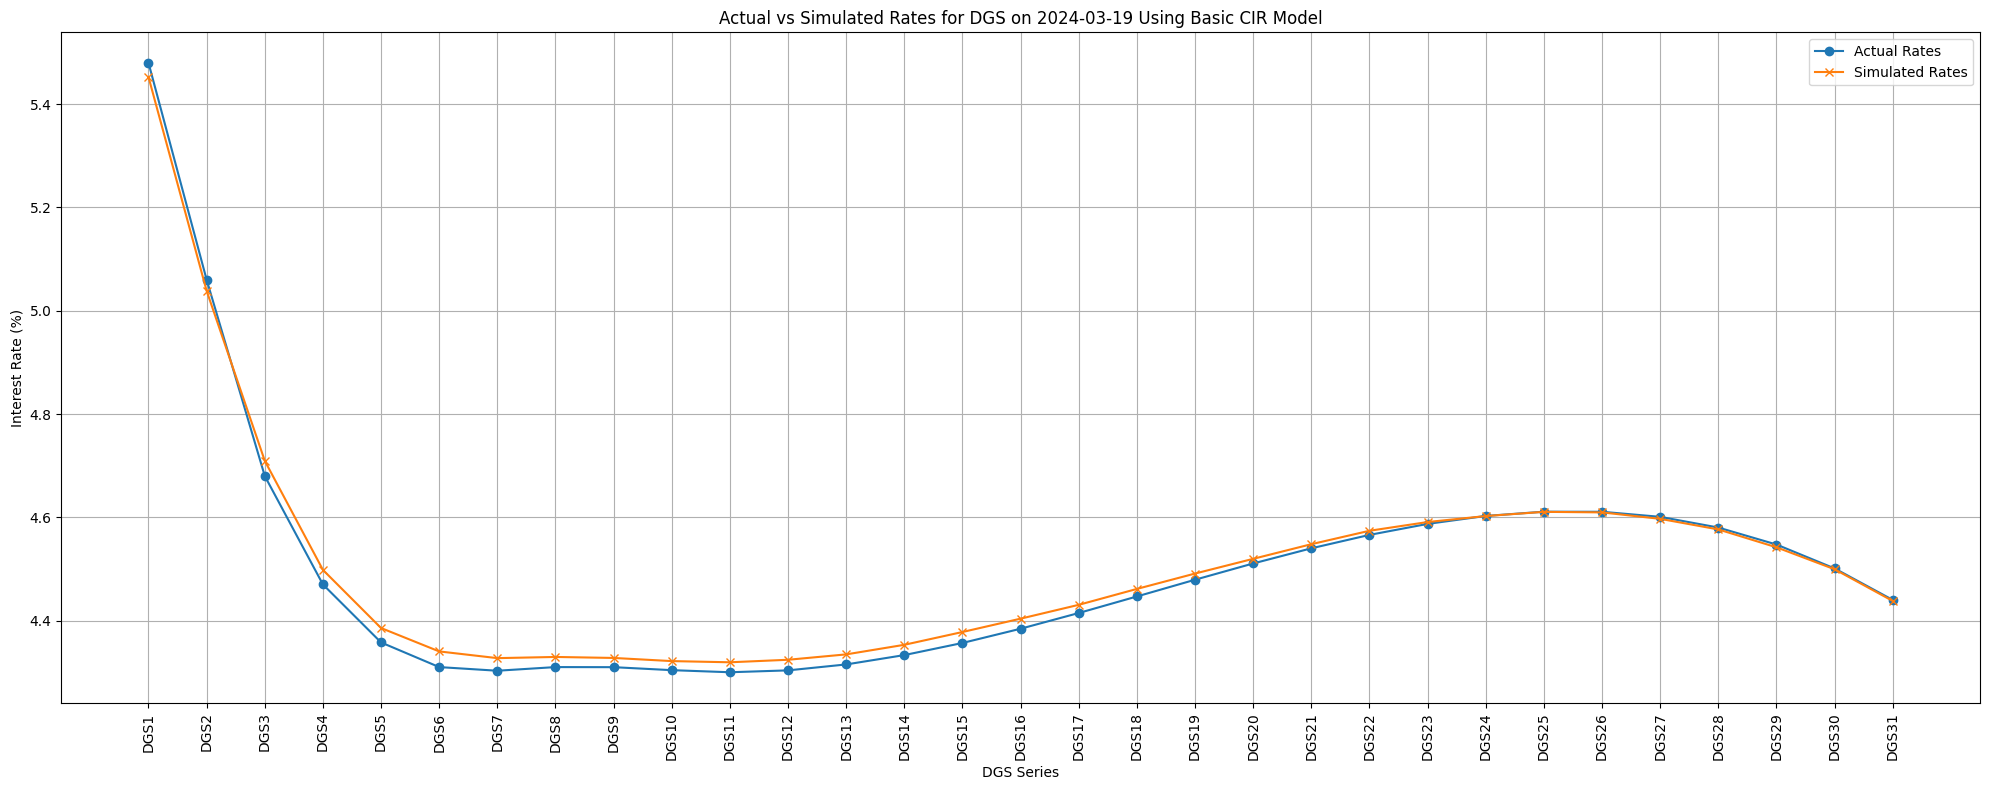

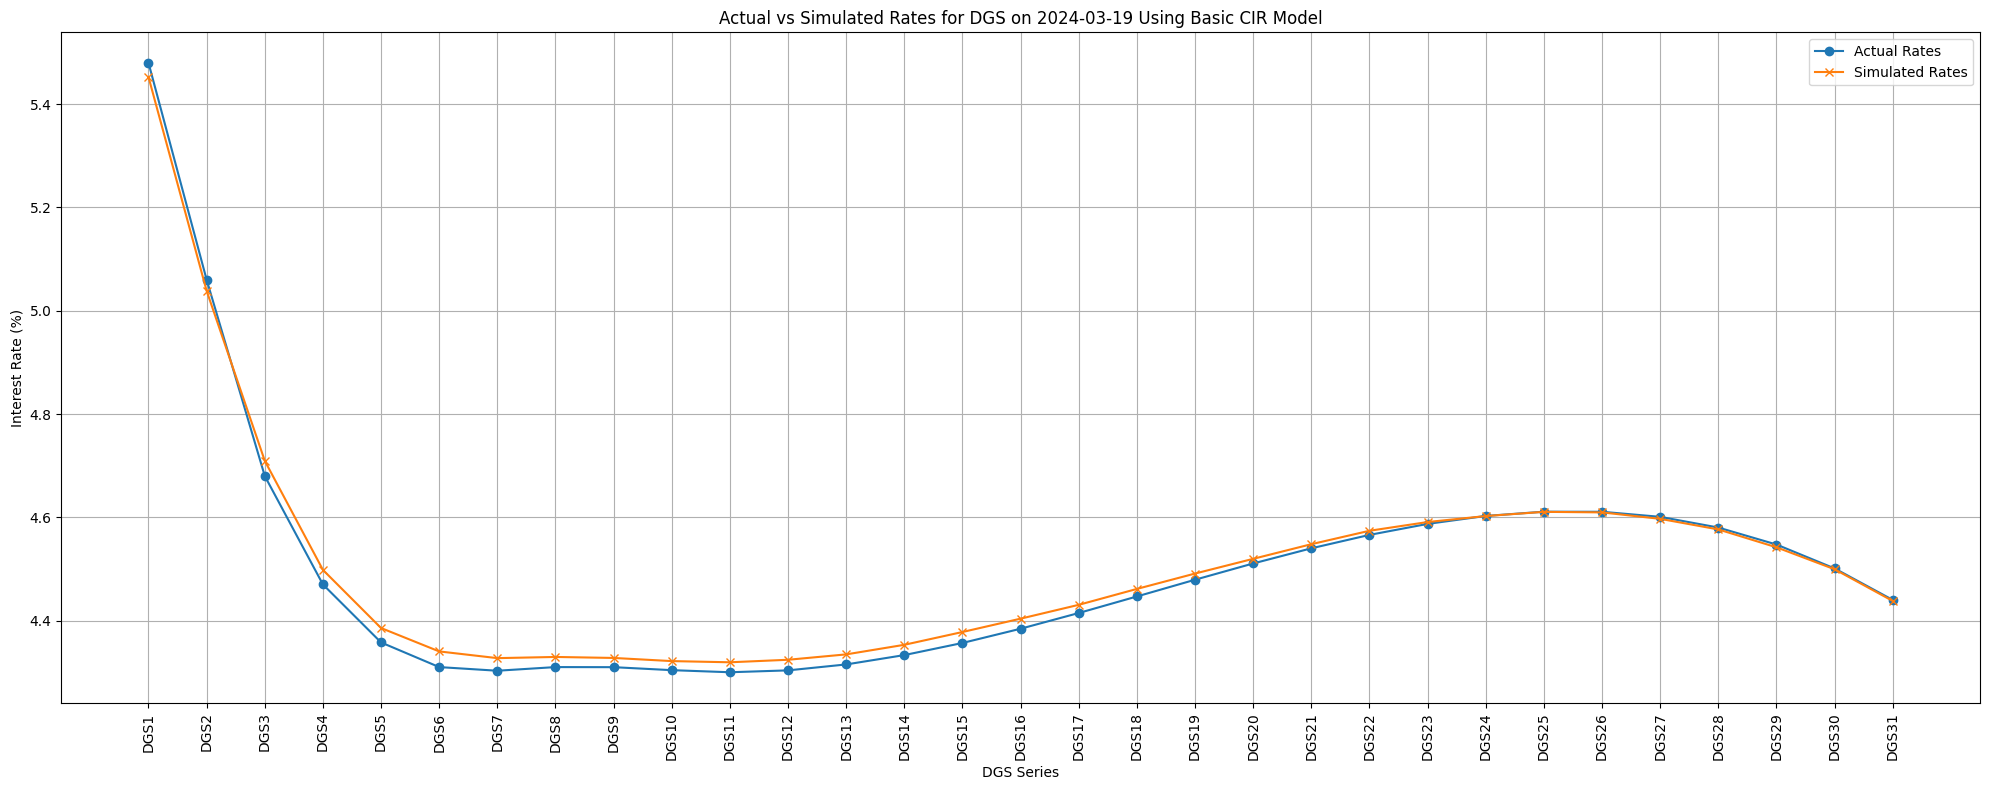

,Actual Rates,Simulated Rates
DGS3MO,5.480000,5.452523
DGS1,5.060000,5.038497
DGS2,4.680000,4.709367
DGS3,4.470000,4.498183
DGS4,4.357705,4.385597
DGS5,4.310000,4.340332
DGS6,4.302930,4.327327
DGS7,4.310000,4.329616
DGS8,4.309832,4.327694
DGS9,4.304042,4.321600


In [85]:
# Optimized parameters provided by the user
optimized_params = {
    "kappa": 1.2310,
    "mu_r": 0.0459,
    "sigma": 0.1410
}

# Creating an instance of the BasicCIRModel with the optimized parameters
basic_cir_model = BasicCIRModel(**optimized_params)


# Define the simulation date
simulation_date = pd.Timestamp('2024-03-19')

# Extract the actual rates for the simulation date from the mock data
# (Replace this with the actual data loading code in practice)
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate using BasicCIRModel
def simulate_single_rate_cir(model, initial_rate):
    dt = 1 / 252  # Assume dt is 1 day as we simulate just for the next day
    return model.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS using BasicCIRModel
simulated_rates_cir = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        simulated_rates_cir[column] = simulate_single_rate_cir(basic_cir_model, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_cir_df = pd.DataFrame(simulated_rates_cir, index=[simulation_date])


# Combine actual and simulated rates into one DataFrame for comparison
comparison_data_cir = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_cir_df.iloc[0]
})

# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]


# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data_cir['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data_cir['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-03-19 Using Basic CIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('CIR.png')  # This line will save the figure as 'CIR.png'

plt.show()  # This will display the plot in the output



# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data_cir['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data_cir['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-03-19 Using Basic CIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('CIR.png')  # This line will save the figure as 'CIR.png'

plt.show()  # This will display the plot in the output


comparison_data_cir  

#### 
Bond Price Prediction

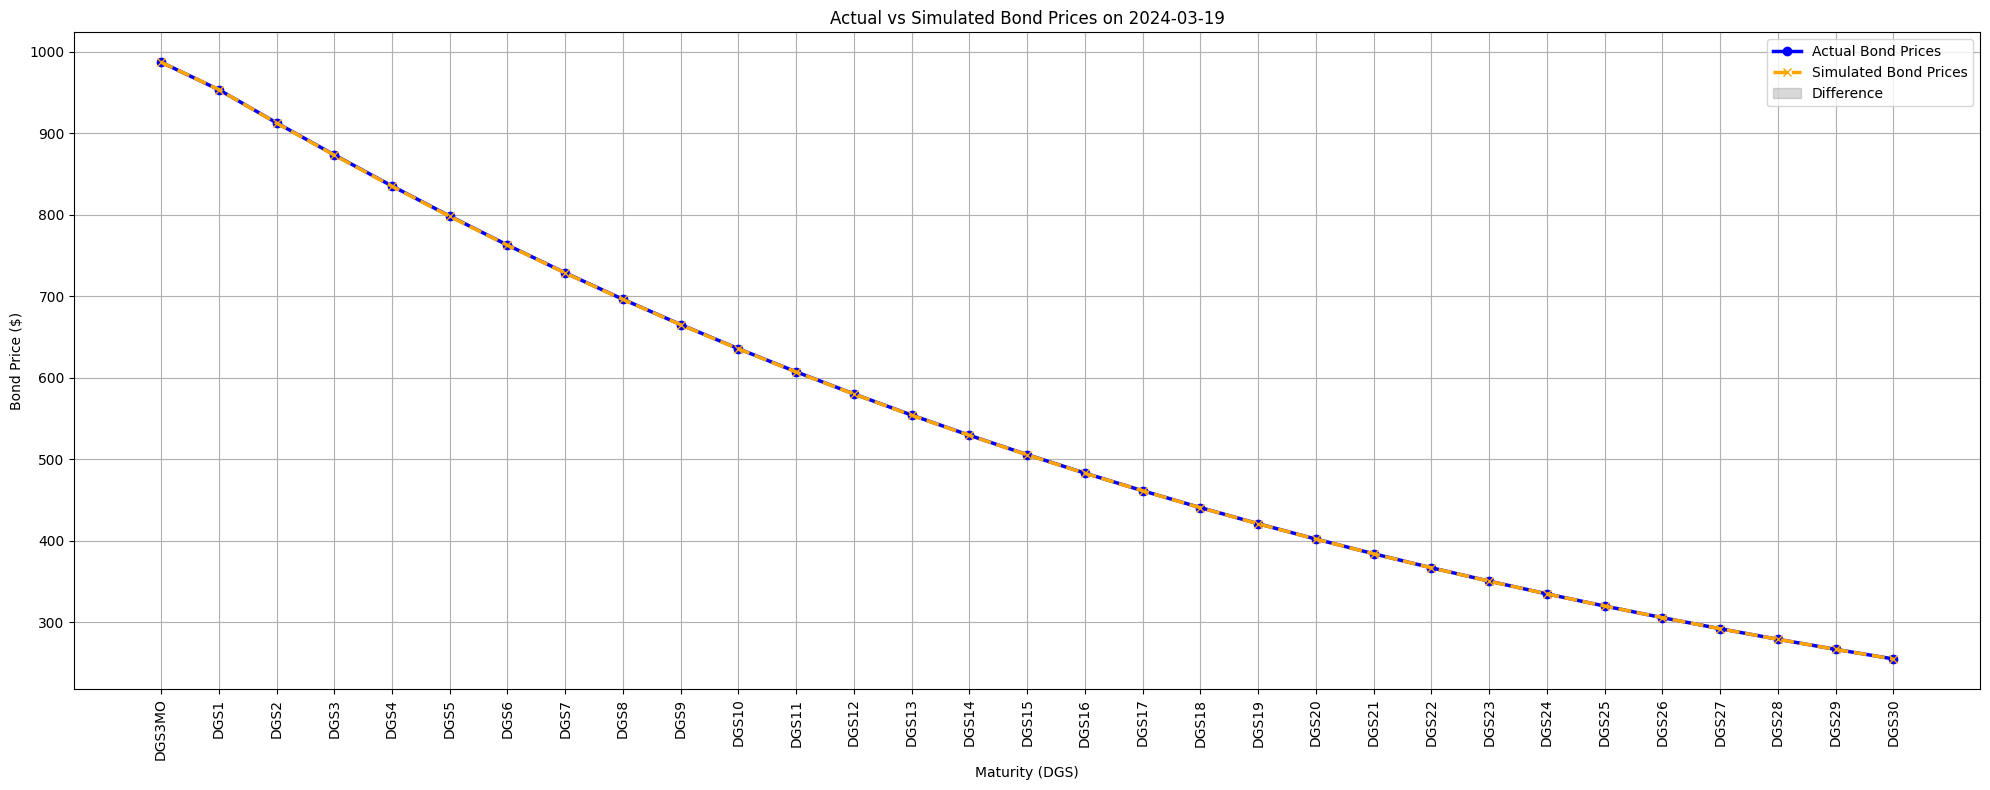

In [86]:
# Define the bond's face value
face_value = 1000  # For example, the face value of the bond

# Function to convert nominal annual rate to continuous compounding rate
def nominal_to_continuous(nominal_rate):
    return np.log(1 + nominal_rate)

# Function to calculate bond price using the CIR model for zero-coupon bonds
def calculate_bond_price_cir(model, rt, T, t=0):
    # Since the exact_solution assumes zero t, we adjust T by subtracting t
    adjusted_maturity = T - t
    return model.exact_solution(rt, adjusted_maturity)


# Function to simulate bond prices
def simulate_bond_prices(model, data, face_value, simulation_date):
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            try:
                last_rate = data[column].loc[data.index < simulation_date].iloc[-1] / 100
                simulated_rate = model.next_rate(last_rate, 1/252)  
                
                maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
                continuous_rate = nominal_to_continuous(simulated_rate)
                
                bond_price = calculate_bond_price_cir(model, continuous_rate, maturity) * face_value
                simulated_bond_prices[column] = bond_price
            except ValueError:
                continue
    return simulated_bond_prices


# Function to calculate actual bond prices using market rates
def calculate_actual_bond_prices(data, face_value, simulation_date):
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            try:
                last_nominal_rate = data[column].loc[data.index <= simulation_date].iloc[-1] / 100
                last_continuous_rate = nominal_to_continuous(last_nominal_rate)
                
                maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
                
                # Calculate bond price using the continuous rate
                bond_price = calculate_bond_price_cir(basic_cir_model, last_continuous_rate, maturity) * face_value
                actual_bond_prices[column] = bond_price
            except ValueError:
                continue
    return actual_bond_prices

# Simulate bond prices
simulated_bond_prices = simulate_bond_prices(basic_cir_model, data, face_value, simulation_date)

# Calculate actual bond prices
actual_bond_prices = calculate_actual_bond_prices(data, face_value, simulation_date)

# Create DataFrames from the bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame from the simulated bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])# Function to calculate actual bond prices using the same formula as for simulated prices


# Create a DataFrame from the actual bond prices
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame combining actual and simulated bond prices
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices_df.iloc[0],
    'Simulated Bond Prices': simulated_bond_prices_df.iloc[0]
})


# Plotting both actual and simulated bond prices with enhanced visibility
plt.figure(figsize=(20, 8))

# Plot actual bond prices with a solid blue line and circle markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'],
         label='Actual Bond Prices', marker='o', linestyle='-', color='blue', linewidth=2.5)

# Plot simulated bond prices with a dashed orange line and x markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'],
         label='Simulated Bond Prices', marker='x', linestyle='--', color='orange', linewidth=2.5)

# Highlight the differences by plotting the differences
plt.fill_between(combined_bond_prices_df.index, 
                 combined_bond_prices_df['Actual Bond Prices'], 
                 combined_bond_prices_df['Simulated Bond Prices'], 
                 color='gray', alpha=0.3, label='Difference')

# Title and labels
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')

# Improve the x-axis labels readability
plt.xticks(rotation=90)

# Legend and grid
plt.legend()
plt.grid(True)

# Layout adjustment
plt.tight_layout()
plt.savefig('CIR_bondprice.png')
# Show the plot
plt.show()



In [87]:
print(combined_bond_prices_df)

        Actual Bond Prices  Simulated Bond Prices
DGS3MO          987.008875             986.992376
DGS1            953.304664             953.396965
DGS2            912.647689             912.349818
DGS3            873.326469             872.972008
DGS4            835.132555             834.791040
DGS5            798.205797             797.812593
DGS6            762.667283             762.432842
DGS7            728.629534             728.377336
DGS8            696.149351             695.927108
DGS9            665.145829             664.882162
DGS10           635.514446             635.305591
DGS11           607.167021             606.901278
DGS12           580.048755             579.911891
DGS13           554.113352             553.911912
DGS14           529.315656             529.122206
DGS15           505.611665             505.413809
DGS16           482.958556             482.782475
DGS17           461.314691             461.195318
DGS18           440.639627             440.496120


### ECIR Model

#### Yield Rate Prediction

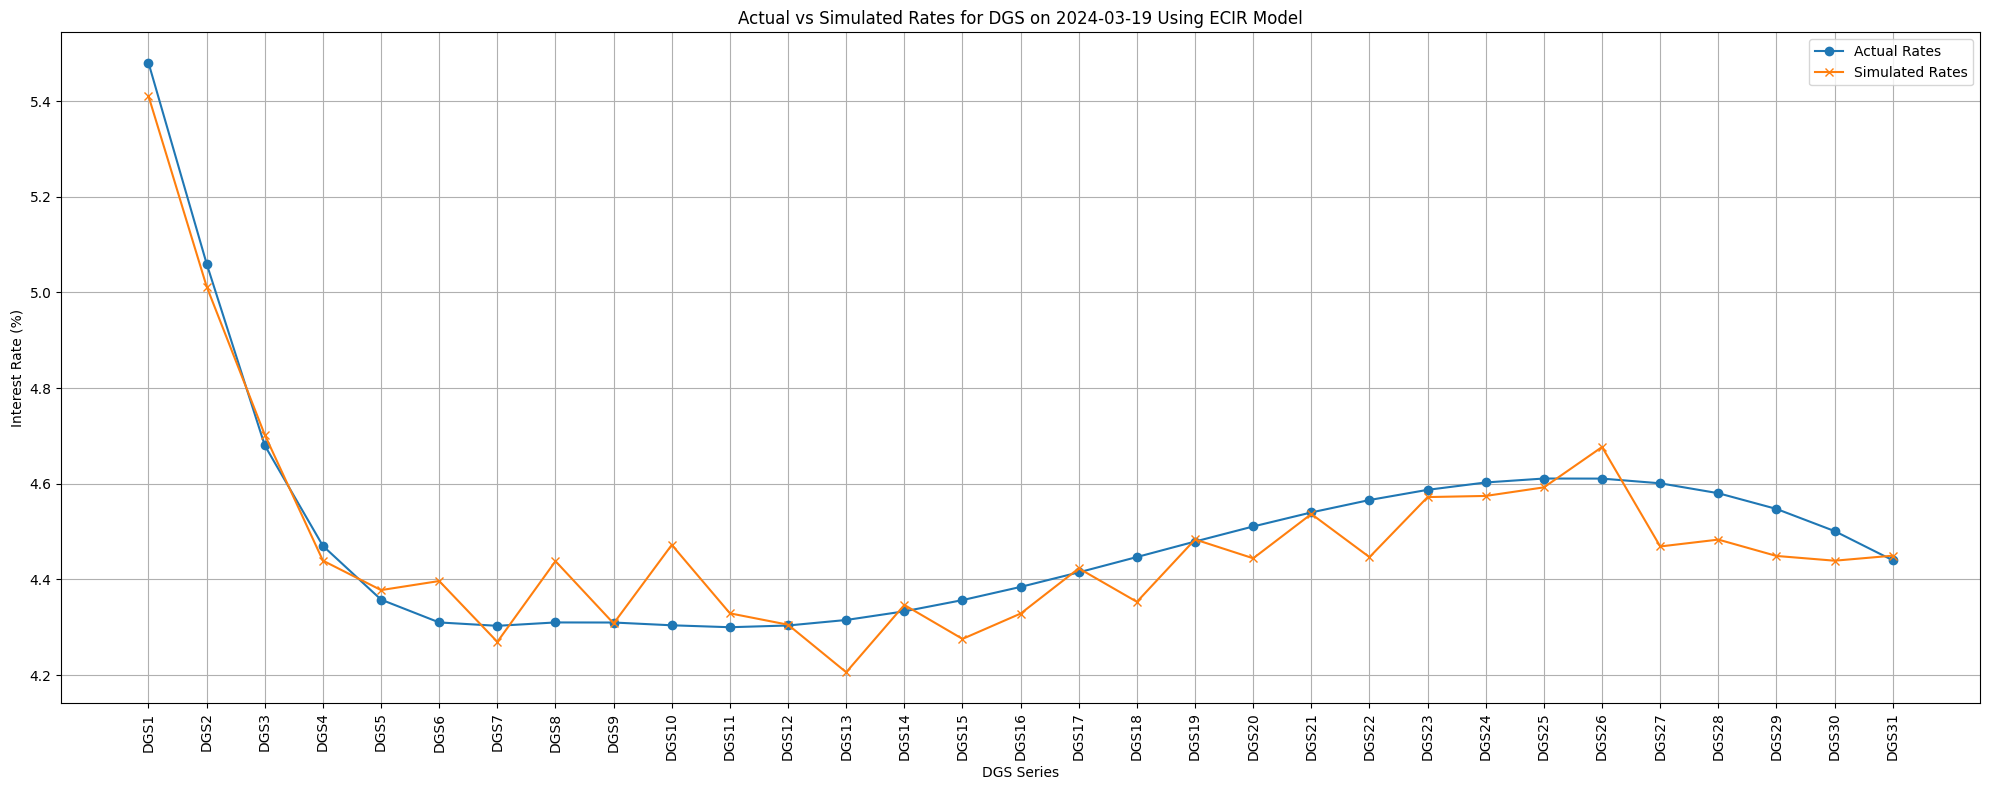

In [88]:
# Model parameters
params = {
    "kappa": 3.071,    
    "mu_r": 0.007668,     
    "sigma": 0.3419,    
    "mu": 0.08226,      
    "gamma": 0.04355 ,   
    # "r": 66,             
    # "p": 0.3049          
}

# Creating an instance of the ECIRModel
model2 = ECIRModel(**params)# Define the simulation date
simulation_date = pd.Timestamp('2024-03-19')

# Extract the actual rates for the simulation date
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate
def simulate_single_rate(model2, initial_rate):
    # Assume dt is 1 day as we simulate just for the next day
    dt = 1 / 252
    return model2.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS
simulated_rates = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        # Get the initial rate from the previous available data point
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        # Simulate the rate using the model2
        simulated_rates[column] = simulate_single_rate(model2, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_df = pd.DataFrame(simulated_rates, index=[simulation_date])

# Combine actual and simulated rates into one DataFrame for comparison
comparison_data = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_df.iloc[0]
})



# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-03-19 Using ECIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ECIR.png')
plt.show()


In [89]:
comparison_data

,Actual Rates,Simulated Rates
DGS3MO,5.480000,5.410499
DGS1,5.060000,5.012302
DGS2,4.680000,4.702270
DGS3,4.470000,4.439226
DGS4,4.357705,4.377628
DGS5,4.310000,4.396590
DGS6,4.302930,4.269400
DGS7,4.310000,4.438113
DGS8,4.309832,4.307889
DGS9,4.304042,4.472215


#### Bond Price Prediction

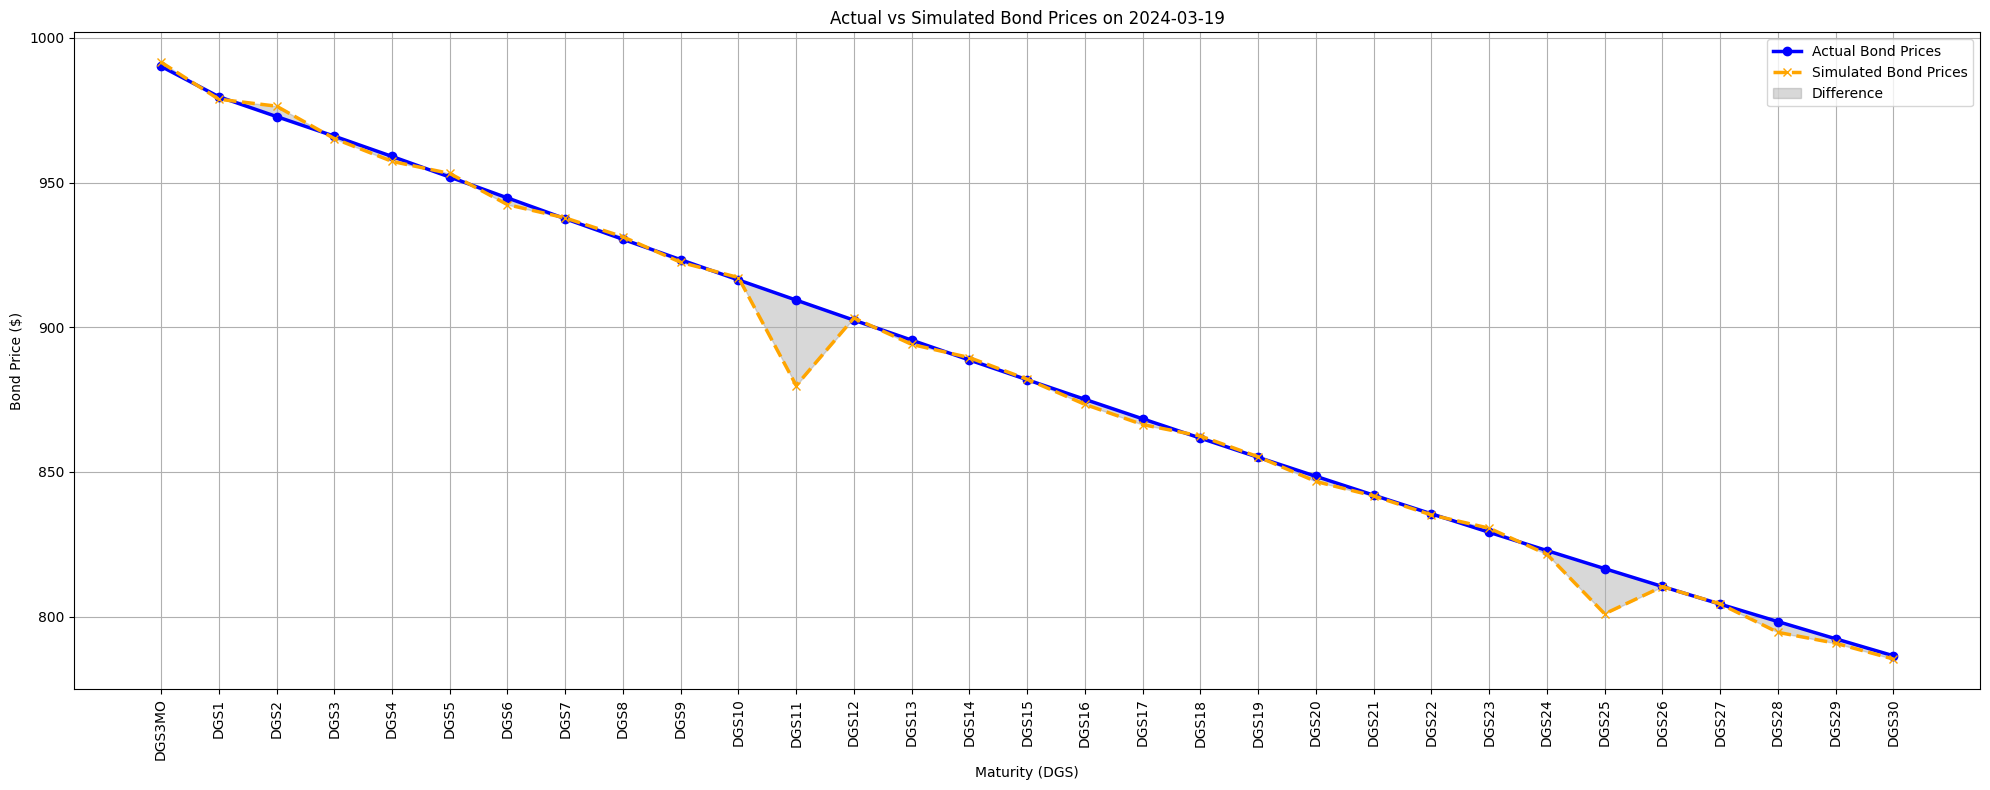

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the bond's face value
face_value = 1000  # The face value of the bond

# Function to convert nominal annual rate to continuous compounding rate
def nominal_to_continuous(nominal_rate):
    return np.log(1 + nominal_rate)


# def calculate_bond_price_ecir(model2, rt, T, t=0):
#     return model.bond_price(rt, T, t)
def calculate_bond_price_ecir(model2, rt, T, t=0):
    # Since the exact_solution assumes zero t, we adjust T by subtracting t
    adjusted_maturity = T - t
    return model2.exact_solution(rt, adjusted_maturity)

# Function to simulate bond prices
def simulate_bond_prices(model2, data, face_value, simulation_date):
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            last_rate = data[column].loc[data.index < simulation_date].iloc[-1] / 100
            simulated_rate = model2.next_rate(last_rate, 1/252)  # Simulating next rate
            maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
            continuous_rate = nominal_to_continuous(simulated_rate)
            bond_price = calculate_bond_price_ecir(model2, continuous_rate, maturity) * face_value
            simulated_bond_prices[column] = bond_price
    return simulated_bond_prices

# Function to calculate actual bond prices using market rates
def calculate_actual_bond_prices(data, face_value, simulation_date):
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            last_rate = data[column].loc[data.index <= simulation_date].iloc[-1] / 100
            continuous_rate = nominal_to_continuous(last_rate)
            maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
            bond_price = calculate_bond_price_ecir(model2, continuous_rate, maturity) * face_value
            actual_bond_prices[column] = bond_price
    return actual_bond_prices


# Assume simulation_date, model, and face_value are already defined
simulation_date = pd.Timestamp('2024-03-19')
ecir_model = ECIRModel(kappa=3.071, mu_r=0.007668, sigma=0.3419,mu=0.08226,gamma=0.04355 )  # Example model parameters

# Simulate bond prices
simulated_bond_prices2 = simulate_bond_prices(ecir_model, data, face_value, simulation_date)

# Calculate actual bond prices
actual_bond_prices2 = calculate_actual_bond_prices(data, face_value, simulation_date)

# Create DataFrames from the bond prices
simulated_bond_prices_df2 = pd.DataFrame(simulated_bond_prices2, index=[simulation_date])
actual_bond_prices_df2 = pd.DataFrame(actual_bond_prices2, index=[simulation_date])

# Create a DataFrame combining actual and simulated bond prices
combined_bond_prices_df2 = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices_df2.iloc[0],
    'Simulated Bond Prices': simulated_bond_prices_df2.iloc[0]
})

# Plotting both actual and simulated bond prices with enhanced visibility
plt.figure(figsize=(20, 8))

# Plot actual bond prices with a solid blue line and circle markers
plt.plot(combined_bond_prices_df2.index, combined_bond_prices_df2['Actual Bond Prices'],
         label='Actual Bond Prices', marker='o', linestyle='-', color='blue', linewidth=2.5)

# Plot simulated bond prices with a dashed orange line and x markers
plt.plot(combined_bond_prices_df2.index, combined_bond_prices_df2['Simulated Bond Prices'],
         label='Simulated Bond Prices', marker='x', linestyle='--', color='orange', linewidth=2.5)

# Highlight the differences by plotting the differences
plt.fill_between(combined_bond_prices_df2.index, 
                 combined_bond_prices_df2['Actual Bond Prices'], 
                 combined_bond_prices_df2['Simulated Bond Prices'], 
                 color='gray', alpha=0.3, label='Difference')

# Title and labels
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')

# Improve the x-axis labels readability
plt.xticks(rotation=90)

# Legend and grid
plt.legend()
plt.grid(True)

# Layout adjustment
plt.tight_layout()
plt.savefig('ECIR_bondprice.png')
# Show the plot
plt.show()



In [91]:
print(combined_bond_prices_df2)

        Actual Bond Prices  Simulated Bond Prices
DGS3MO          990.167140             991.607859
DGS1            979.679530             978.805914
DGS2            972.815592             976.405321
DGS3            966.034598             965.206905
DGS4            959.033157             957.322471
DGS5            951.892895             953.136898
DGS6            944.686759             942.356677
DGS7            937.494044             937.779294
DGS8            930.376989             931.246991
DGS9            923.330066             922.438679
DGS10           916.331553             917.157764
DGS11           909.364423             879.844544
DGS12           902.428252             903.200612
DGS13           895.526624             894.066506
DGS14           888.663016             889.489283
DGS15           881.840794             882.011814
DGS16           875.063216             873.326332
DGS17           868.333433             866.333151
DGS18           861.654487             862.403627


### Absolute Error of Yield Rate

In [92]:
comparison_data_cir['Absolute Error CIR'] = (comparison_data_cir['Actual Rates'] - comparison_data_cir['Simulated Rates']).abs()
comparison_data['Absolute Error ECIR'] = (comparison_data['Actual Rates'] - comparison_data['Simulated Rates']).abs()
# Select only the 'Absolute Error CIR' column from comparison_data_cir
comparison_data_cir_errors = comparison_data_cir[['Absolute Error CIR']]

# Select only the 'Absolute Error ECIR' column from comparison_data
comparison_data_errors = comparison_data[['Absolute Error ECIR']]

# Merge the DataFrames on their index
combined_error_data = comparison_data_cir_errors.join(comparison_data_errors)

# Now combined_error_data DataFrame should have the columns:
# 'Absolute Error CIR' and 'Absolute Error ECIR'
combined_error_data

,Absolute Error CIR,Absolute Error ECIR
DGS3MO,0.027477,0.069501
DGS1,0.021503,0.047698
DGS2,0.029367,0.022270
DGS3,0.028183,0.030774
DGS4,0.027892,0.019923
DGS5,0.030332,0.086590
DGS6,0.024397,0.033530
DGS7,0.019616,0.128113
DGS8,0.017863,0.001943
DGS9,0.017557,0.168173


### Absolute Error of Bond Price

In [82]:
combined_bond_prices_df['Absolute Error CIR'] = (combined_bond_prices_df['Actual Bond Prices'] - combined_bond_prices_df['Simulated Bond Prices']).abs()
combined_bond_prices_df2['Absolute Error ECIR'] = (combined_bond_prices_df2['Actual Bond Prices'] - combined_bond_prices_df2['Simulated Bond Prices']).abs()

combined_bond_prices_errors = combined_bond_prices_df[['Absolute Error CIR']]

# Select only the 'Absolute Error ECIR' column from comparison_data
combined_bond_prices2_errors = combined_bond_prices_df2[['Absolute Error ECIR']]

# Merge the DataFrames on their index
combined_error_data2 = combined_bond_prices_errors .join(combined_bond_prices2_errors)

# Now combined_error_data DataFrame should have the columns:
# 'Absolute Error CIR' and 'Absolute Error ECIR'
combined_error_data2

,Absolute Error CIR,Absolute Error ECIR
DGS3MO,0.001054,0.216559
DGS1,0.064132,0.773719
DGS2,0.360244,0.220019
DGS3,0.298657,38.533842
DGS4,0.350320,0.326027
DGS5,0.395800,1.250087
DGS6,0.264296,0.686298
DGS7,0.169837,0.990164
DGS8,0.089293,2.158843
DGS9,0.165803,0.541192
